# Assignment 2

* Ryan Rickgauer
* z1729300

Import required libraries

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
from operator import itemgetter

## Question 1

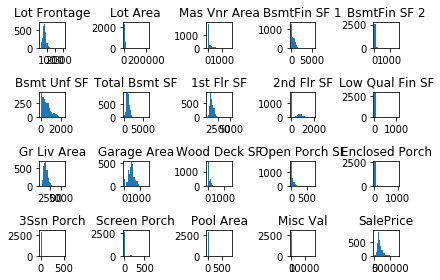

In [49]:
# function to quickly plot a histogram subplot of the data
def plot(data, ax, x, y, title):
    ax[y, x].hist(data, 20)
    ax[y, x].set_title(title)

data = pd.read_excel("http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls")

# create subplots
fig, ax = plt.subplots(4, 5)

# row 1
plot(data['Lot Frontage'], ax, 0, 0, 'Lot Frontage')
plot(data['Lot Area'], ax, 1, 0, 'Lot Area')
plot(data['Mas Vnr Area'], ax, 2, 0, 'Mas Vnr Area')
plot(data['BsmtFin SF 1'], ax, 3, 0, 'BsmtFin SF 1')
plot(data['BsmtFin SF 2'], ax, 4, 0, 'BsmtFin SF 2')

# row 2
plot(data['Bsmt Unf SF'], ax, 0, 1, 'Bsmt Unf SF')
plot(data['Total Bsmt SF'], ax, 1, 1, 'Total Bsmt SF')
plot(data['1st Flr SF'], ax, 2, 1, '1st Flr SF')
plot(data['2nd Flr SF'], ax, 3, 1, '2nd Flr SF')
plot(data['Low Qual Fin SF'], ax, 4, 1, 'Low Qual Fin SF')

# row 3
plot(data['Gr Liv Area'], ax, 0, 2, 'Gr Liv Area')
plot(data['Garage Area'], ax, 1, 2, 'Garage Area')
plot(data['Wood Deck SF'], ax, 2, 2, 'Wood Deck SF')
plot(data['Open Porch SF'], ax, 3, 2, 'Open Porch SF')
plot(data['Enclosed Porch'], ax, 4, 2, 'Enclosed Porch')

# row 4
plot(data['3Ssn Porch'], ax, 0, 3, '3Ssn Porch')
plot(data['Screen Porch'], ax, 1, 3, 'Screen Porch')
plot(data['Pool Area'], ax, 2, 3, 'Pool Area')
plot(data['Misc Val'], ax, 3, 3, 'Misc Val')
plot(data['SalePrice'], ax, 4, 3, 'SalePrice')

fig.tight_layout()
plt.show()

Something that might required special treatment is that there are zeveral 0 values in the data. They will need to be dealt with later.

## Question 2

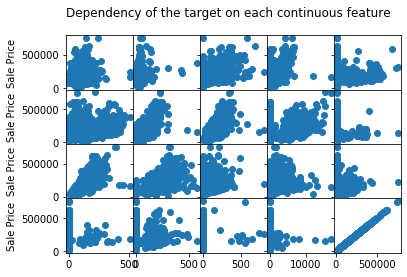

In [50]:
fig, ax = plt.subplots(4, 5)

ax[0, 0].scatter(data['Lot Frontage'], data['SalePrice'])
ax[0, 1].scatter(data['Lot Area'], data['SalePrice'])
ax[0, 2].scatter(data['Mas Vnr Area'], data['SalePrice'])
ax[0, 3].scatter(data['BsmtFin SF 1'], data['SalePrice'])
ax[0, 4].scatter(data['BsmtFin SF 2'], data['SalePrice'])

# row 2
ax[1, 0].scatter(data['Bsmt Unf SF'], data['SalePrice'])
ax[1, 1].scatter(data['Total Bsmt SF'], data['SalePrice'])
ax[1, 2].scatter(data['1st Flr SF'], data['SalePrice'])
ax[1, 3].scatter(data['2nd Flr SF'], data['SalePrice'])
ax[1, 4].scatter(data['Low Qual Fin SF'], data['SalePrice'])

# row 3
ax[2, 0].scatter(data['Gr Liv Area'], data['SalePrice'])
ax[2, 1].scatter(data['Garage Area'], data['SalePrice'])
ax[2, 2].scatter(data['Wood Deck SF'], data['SalePrice'])
ax[2, 3].scatter(data['Open Porch SF'], data['SalePrice'])
ax[2, 4].scatter(data['Enclosed Porch'], data['SalePrice'])

# # row 4
ax[3, 0].scatter(data['3Ssn Porch'], data['SalePrice'])
ax[3, 1].scatter(data['Screen Porch'], data['SalePrice'])
ax[3, 2].scatter(data['Pool Area'], data['SalePrice'])
ax[3, 3].scatter(data['Misc Val'], data['SalePrice'])
ax[3, 4].scatter(data['SalePrice'], data['SalePrice'])

fig.subplots_adjust(wspace=0, hspace=0)
for x in ax.flat:
    x.set(ylabel='Sale Price')
    x.label_outer()

fig.suptitle('Dependency of the target on each continuous feature')
plt.show()

## Question 3

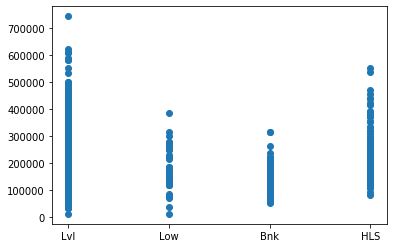

In [68]:
def getScoreList(X_train):

    # data = getData()
    #
    # # train and split the data
    # X_train, X_test, y_train, y_test = train_test_split(data, data['SalePrice'])
    target = X_train['SalePrice']

    scoreList = []
    scoreList.append(getScores(target, X_train['MS SubClass']))
    scoreList.append(getScores(target, X_train['MS Zoning']))
    scoreList.append(getScores(target, X_train['Street']))
    scoreList.append(getScores(target, X_train['Alley']))
    scoreList.append(getScores(target, X_train['Land Contour']))
    scoreList.append(getScores(target, X_train['Lot Config']))
    scoreList.append(getScores(target, X_train['Neighborhood']))
    scoreList.append(getScores(target, X_train['Condition 1']))
    scoreList.append(getScores(target, X_train['Condition 2']))
    scoreList.append(getScores(target, X_train['Bldg Type']))
    scoreList.append(getScores(target, X_train['House Style']))
    scoreList.append(getScores(target, X_train['Roof Style']))
    scoreList.append(getScores(target, X_train['Roof Matl']))
    scoreList.append(getScores(target, X_train['Exterior 1st']))
    scoreList.append(getScores(target, X_train['Exterior 2nd']))
    scoreList.append(getScores(target, X_train['Mas Vnr Type']))
    scoreList.append(getScores(target, X_train['Foundation']))
    scoreList.append(getScores(target, X_train['Heating']))
    scoreList.append(getScores(target, X_train['Central Air']))
    scoreList.append(getScores(target, X_train['Garage Type']))
    scoreList.append(getScores(target, X_train['Misc Feature']))
    scoreList.append(getScores(target, X_train['Sale Type']))
    scoreList.append(getScores(target, X_train['Sale Condition']))

    return scoreList

def getScores(target, categories):

    pr = target
    z = categories

    # get dummy data
    # ZE=pd.get_dummies(z, prefix_sep = ['zoning'], columns=['MS Zoning'])
    ZE=pd.get_dummies(z)

    # merge the validated dummy data with the saleprice data
    ZE_concat = pd.concat([ZE, pr], axis=1)

    # validate scores
    scores = cross_val_score(KNeighborsRegressor(), ZE_concat, ZE_concat['SalePrice'], scoring='r2')

    score = {
        'name': categories.name,
        'scores': scores
    }

    return score

def printMeans(means):
    print('\n\n')
    print(f'{"Category Name":20} ==>   {"Mean":10}')
    for item in means:
        print(f'{item["name"]:20} ==>   {str(item["mean"]):10}')

def getMeans(scoreList):
    means = []
    for category in scoreList:
        mean = np.mean(category['scores'])

        dict = {
            'name': str(category['name']),
            'mean': float(mean)
        }

        means.append(dict)

    return means



################################################################################################
# main


# train and split the data
X_train, X_test, y_train, y_test = train_test_split(data, data['SalePrice'])
# target = X_train['SalePrice']

scoreList = getScoreList(X_train)
means = getMeans(scoreList)


result = sorted(means, key=itemgetter('mean'))


x = np.array(X_train['Land Contour'])
y = np.array(X_train['SalePrice'])

# print(x)


plt.scatter(x, y)
plt.show()

## Question 4

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.exceptions import ConvergenceWarning

def space(numSpaces = 5):
    for x in range(numSpaces): print('')

def getNorminalColumnNames():
    categorical_features = []
    categorical_features.append('MS SubClass')
    categorical_features.append('MS Zoning')
    categorical_features.append('Street')
    categorical_features.append('Alley')
    categorical_features.append('Land Contour')
    categorical_features.append('Lot Config')
    categorical_features.append('Neighborhood')
    categorical_features.append('Condition 1')
    categorical_features.append('Condition 2')
    categorical_features.append('Bldg Type')
    categorical_features.append('House Style')
    categorical_features.append('Roof Style')
    categorical_features.append('Roof Matl')
    categorical_features.append('Exterior 1st')
    categorical_features.append('Exterior 2nd')
    categorical_features.append('Mas Vnr Type')
    categorical_features.append('Foundation')
    categorical_features.append('Heating')
    categorical_features.append('Central Air')
    categorical_features.append('Garage Type')
    categorical_features.append('Misc Feature')
    categorical_features.append('Sale Type')
    categorical_features.append('Sale Condition')
    return categorical_features


# ignore warnings
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

# break down data
data = pd.read_excel('http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls')                                     # raw dataset


# split data
X = data.drop(columns=['SalePrice'])                                        # all inputs
y = data['SalePrice']                                                       # target

X_train, X_test, y_train, y_test = train_test_split(X, y)

# convert MS SubClass to a categorial data type
convert_dict = {'MS SubClass': object}
X_train = X_train.astype(convert_dict)



# get a list of all the categorical feature column names
categorical_features = list(X_train.select_dtypes(include='object').columns)      # categorical col names
norminal_features = getNorminalColumnNames()                                # norminol col names
ordinal_features = []                                                       # ordinal feature names
for name in categorical_features:
    if name not in norminal_features:
        ordinal_features.append(name)


# get numerical feature column list
numerical_features = list(X_train.select_dtypes(exclude='object').columns)

# drop 2 first columns (Order and PID)
numerical_features.pop(0)
numerical_features.pop(0)



# ndrop the ordinal category_train columns
X_train.drop(ordinal_features, axis=1, inplace=True)

# replace NaN nominal values
for cat in norminal_features:
    X_train[cat].fillna(value='fillna value', inplace=True)

# replace NaN numberical values with 0
X_train.fillna(0, inplace=True)


scores = {'ols': 0, 'ridge': 0, 'lasso': 0, 'elasticNet': 0}    # hold 4 calculated scores



# no standard scalar
column_trans = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), norminal_features), remainder='passthrough')
column_trans.fit_transform(X_train)

# ols score
pipeline = make_pipeline(column_trans, LinearRegression())
scores['ols'] = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()


# ridge score
pipeline = make_pipeline(column_trans, Ridge())
scores['ridge'] = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()

# lasso score
pipeline = make_pipeline(column_trans, Lasso())
scores['lasso'] = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()

# elastic net score
pipeline = make_pipeline(column_trans, ElasticNet())
scores['elasticNet'] = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()



# print scores
print('Calculated scores (no Standard Scaler):')
print('* OLS:          ' + str(scores['ols']))
print('* Ridge:        ' + str(scores['ridge']))
print('* Lasso:        ' + str(scores['lasso']))
print('* Elastic Net:  ' + str(scores['elasticNet']))


# use the standard scalar
column_trans = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), norminal_features), (StandardScaler(), numerical_features), remainder='passthrough')
column_trans.fit_transform(X_train)

# ols score
pipeline = make_pipeline(column_trans, LinearRegression())
scores['ols'] = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()

# ridge score
pipeline = make_pipeline(column_trans, Ridge())
scores['ridge'] = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()


# lasso score
pipeline = make_pipeline(column_trans, Lasso())
scores['lasso'] = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()

# elastic net score
pipeline = make_pipeline(column_trans, ElasticNet())
scores['elasticNet'] = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()

# print scores that use standard scalar
space(3)
print('Calculated scores (WITH Standard Scaler):')
print('* OLS:          ' + str(scores['ols']))
print('* Ridge:        ' + str(scores['ridge']))
print('* Lasso:        ' + str(scores['lasso']))
print('* Elastic Net:  ' + str(scores['elasticNet']))


Calculated scores (no Standard Scaler):
* OLS:          0.7113614016976509
* Ridge:        0.061158677948938166
* Lasso:        0.8114830389956232
* Elastic Net:  0.777048916340902



Calculated scores (WITH Standard Scaler):
* OLS:          0.060444233475644336
* Ridge:        0.06115867769702532
* Lasso:        0.8115117481503307
* Elastic Net:  0.7922866179728881


## Question 5

Setup data

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV

def space(numSpaces = 5):
    for x in range(numSpaces): print('')

def getNorminalColumnNames():
    categorical_features = []
    categorical_features.append('MS SubClass')
    categorical_features.append('MS Zoning')
    categorical_features.append('Street')
    categorical_features.append('Alley')
    categorical_features.append('Land Contour')
    categorical_features.append('Lot Config')
    categorical_features.append('Neighborhood')
    categorical_features.append('Condition 1')
    categorical_features.append('Condition 2')
    categorical_features.append('Bldg Type')
    categorical_features.append('House Style')
    categorical_features.append('Roof Style')
    categorical_features.append('Roof Matl')
    categorical_features.append('Exterior 1st')
    categorical_features.append('Exterior 2nd')
    categorical_features.append('Mas Vnr Type')
    categorical_features.append('Foundation')
    categorical_features.append('Heating')
    categorical_features.append('Central Air')
    categorical_features.append('Garage Type')
    categorical_features.append('Misc Feature')
    categorical_features.append('Sale Type')
    categorical_features.append('Sale Condition')
    return categorical_features

def getTrainedData():
    # break down data
    data = pd.read_excel('http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls')                                      # raw dataset


    # split data
    X = data.drop(columns=['SalePrice'])                                        # all inputs
    y = data['SalePrice']                                                       # target



    # convert MS SubClass to a categorial data type
    convert_dict = {'MS SubClass': object}
    X = X.astype(convert_dict)



    # get a list of all the categorical feature column names
    categorical_features = list(X.select_dtypes(include='object').columns)      # categorical col names
    norminal_features = getNorminalColumnNames()                                # norminol col names
    ordinal_features = []                                                       # ordinal feature names
    for name in categorical_features:
        if name not in norminal_features:
            ordinal_features.append(name)


    # get numerical feature column list
    numerical_features = list(X.select_dtypes(exclude='object').columns)

    # drop 2 first columns (Order and PID)
    numerical_features.pop(0)
    numerical_features.pop(0)

    # ndrop the ordinal category_train columns
    X.drop(ordinal_features, axis=1, inplace=True)

    # replace NaN nominal values
    for cat in norminal_features:
        X[cat].fillna(value='fillna value', inplace=True)

    # replace NaN numberical values with 0
    X.fillna(0, inplace=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y)


    return (X_train, X_test, y_train, y_test, norminal_features)


# ignore warnings
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.simplefilter("ignore", UserWarning)
scores = {'ols': 0, 'ridge': 0, 'lasso': 0, 'elasticNet': 0}    # hold 4 calculated scores
X_train, X_test, y_train, y_test, norminal_features = getTrainedData()



# no standard scalar
column_trans = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), norminal_features), remainder='passthrough')
column_trans.fit_transform(X_train)

## Get new scores of the models by using GridSearchCV

Linear Regression

In [117]:
# score without GridSearch
pipeline = make_pipeline(column_trans, LinearRegression())
score = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()
print('\nOLS score:       ' + str(score.mean()))

param_grid = {'linearregression__n_jobs': [1, 2, 3, 4, 5]}
grid = GridSearchCV(pipeline, param_grid, cv=10)
grid.fit(X_train, y_train)
# print(grid.best_params_)
print('OLS score tuned: ' + str(grid.score(X_train, y_train)))


OLS score:       0.8022052745476097
OLS score tuned: 0.8134550987985003


Ridge

In [118]:
# ridge score
pipeline = make_pipeline(column_trans, Ridge())
score = cross_val_score(pipeline, X_train, y_train, scoring='r2')
print('\nRidge score:       ' + str(score.mean()))

# ridge score with parameter tuning
param_grid = {'ridge__alpha': [0, 0.01, 0.1, 1, 10, 15]}
grid = GridSearchCV(pipeline, param_grid, cv=10)
grid.fit(X_train, y_train)
# print(grid.best_params_)
print('Ridge score tuned: ' + str(grid.score(X_train, y_train)))


Ridge score:       0.060444346911195865
Ridge score tuned: 0.06430857540818624


Lasso

In [119]:
# lasso
# lasso score
pipeline = make_pipeline(column_trans, Lasso())
score = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()
print('\nLasso score:       ' + str(score))

# lasso score with parameter tuning
param_grid = {'lasso__alpha': [0, 0.01, 0.1, 1, 10, 15]}
grid = GridSearchCV(pipeline, param_grid, cv=10)
grid.fit(X_train, y_train)
print('Lasso score tuned: ' + str(grid.score(X_train, y_train)))


Lasso score:       0.8701222345367764
Lasso score tuned: 0.9126164822884483


Elastic Net

In [120]:
# elastic net score
pipeline = make_pipeline(column_trans, ElasticNet())
score = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()
print('\nElastic net score:       ' + str(score))

# elastic net with gridsearch
param_grid = {'elasticnet__alpha': [0, 0.01, 0.1, 1, 10, 15]}
grid = GridSearchCV(pipeline, param_grid, cv=10)
grid.fit(X_train, y_train)
print('Elastic net score tuned: ' + str(grid.score(X_train, y_train)))


Elastic net score:       0.8589422158445501
Elastic net score tuned: 0.9065211917908252


### Visualize the dependence of the validation score on the parameters

Get the scores for the data using different alpha values of .01, .1, 1, 10, 15

In [121]:
alpha = [.01, .1, 1, 10, 15]
elastic_scores = []
ridge_scores = []
lasso_scores = []

# elastic
pipeline = make_pipeline(column_trans, ElasticNet(alpha=alpha[0]))
score = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()
elastic_scores.append(score)
print('alpha = .01:      ' + str(score))
# axs[0].scatter(alpha[0], score)

pipeline = make_pipeline(column_trans, ElasticNet(alpha=alpha[1]))
score = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()
elastic_scores.append(score)
print('alpha = .1:       ' + str(score))
# axs[0].scatter(alpha[1], score)

pipeline = make_pipeline(column_trans, ElasticNet(alpha=alpha[2]))
score = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()
elastic_scores.append(score)
print('alpha = 1:        ' + str(score))
# axs[0].scatter(alpha[2], score)

pipeline = make_pipeline(column_trans, ElasticNet(alpha=alpha[3]))
score = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()
elastic_scores.append(score)
print('alpha = 10:       ' + str(score))
# axs[0].scatter(alpha[3], score)

pipeline = make_pipeline(column_trans, ElasticNet(alpha=alpha[4]))
score = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()
elastic_scores.append(score)
print('alpha = 15:      ' + str(score))
# axs[0].scatter(alpha[4], score)



# ridge
print("\nRidge")
pipeline = make_pipeline(column_trans, Ridge(alpha=alpha[0]))
score = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()
ridge_scores.append(score)
print('alpha = .01:      ' + str(score))
# axs[1].scatter(alpha[0], score)

pipeline = make_pipeline(column_trans, Ridge(alpha=alpha[1]))
score = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()
print('alpha = .1:       ' + str(score))
# axs[1].scatter(alpha[1], score)
ridge_scores.append(score)

pipeline = make_pipeline(column_trans, Ridge(alpha=alpha[2]))
score = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()
print('alpha = 1:        ' + str(score))
# axs[1].scatter(alpha[2], score)
ridge_scores.append(score)

pipeline = make_pipeline(column_trans, Ridge(alpha=alpha[3]))
score = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()
print('alpha = 10:       ' + str(score))
# axs[1].scatter(alpha[3], score)
ridge_scores.append(score)

pipeline = make_pipeline(column_trans, Ridge(alpha=alpha[4]))
score = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()
print('alpha = 15:      ' + str(score))
# axs[1].scatter(alpha[4], score)
ridge_scores.append(score)


# lasso
print("\nLasso")
pipeline = make_pipeline(column_trans, Lasso(alpha=alpha[0]))
score = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()
print('alpha = .01:      ' + str(score))
# axs[2].scatter(alpha[0], score)
lasso_scores.append(score)

pipeline = make_pipeline(column_trans, Lasso(alpha=alpha[1]))
score = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()
print('alpha = .1:       ' + str(score))
# axs[2].scatter(alpha[1], score)
lasso_scores.append(score)

pipeline = make_pipeline(column_trans, Lasso(alpha=alpha[2]))
score = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()
print('alpha = 1:        ' + str(score))
# axs[2].scatter(alpha[2], score)
lasso_scores.append(score)

pipeline = make_pipeline(column_trans, Lasso(alpha=alpha[3]))
score = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()
print('alpha = 10:       ' + str(score))
# axs[2].scatter(alpha[3], score)
lasso_scores.append(score)

pipeline = make_pipeline(column_trans, Lasso(alpha=alpha[4]))
score = cross_val_score(pipeline, X_train, y_train, scoring='r2').mean()
print('alpha = 15:      ' + str(score))
# axs[2].scatter(alpha[4], score)
lasso_scores.append(score)



alpha = .01:      0.8825732120228329
alpha = .1:       0.8792397202563255
alpha = 1:        0.8589422158445501
alpha = 10:       0.8201406742563269
alpha = 15:      0.815712296906014

Ridge
alpha = .01:      0.060444346911195865
alpha = .1:       0.060444346911195865
alpha = 1:        0.060444346911195865
alpha = 10:       0.060444346911195865
alpha = 15:      0.060444346911195865

Lasso
alpha = .01:      0.8685817602504107
alpha = .1:       0.8687175481514288
alpha = 1:        0.8701222345367764
alpha = 10:       0.8778433370482063
alpha = 15:      0.8798297139853573


Visualize the dependencies

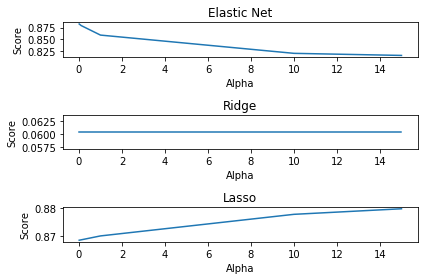

In [123]:
fig, axs = plt.subplots(3)

axs[0].plot(alpha, elastic_scores)
axs[1].plot(alpha, ridge_scores)
axs[2].plot(alpha, lasso_scores)

axs[0].set_title('Elastic Net')
axs[1].set_title('Ridge')
axs[2].set_title('Lasso')

for x in axs:
    x.set(xlabel='Alpha', ylabel='Score')

plt.tight_layout()
plt.show()